# Análise de Vendas de Roupas

# Sobre o Projeto

**Objetivo:** Este projeto tem como objetivo realizar uma análise exploratória de um conjunto de dados fictício de vendas de roupas em diferentes lojas e categorias, com foco em identificar padrões de consumo, produtos mais vendidos e oportunidades de melhoria nas estratégias de vendas.

**Fonte dos Dados:** Os dados foram gerados artificialmente com fins educacionais e simulação de um cenário de vendas realista.  


## Importando bibliotecas necessárias para a ánalise 

In [1]:
#Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Leitura do arquivo CSV
#Lê o arquivo 'vendas_roupas.csv' localizado na pasta 'dados' e armazena no DataFrame df
df = pd.read_csv('../dados/vendas_roupas.csv')

## Explorando os dados

Nessa etapa, vamos começar observando as primeiras linhas do dataset para entender a estrutura dele.

In [3]:
#Visualização inicial do meu arquivo
#Exibe as primeiras 5 linhas do meu DataFrame para ter uma ideia dos dados
df.head()

,Produto,Categoria,Loja,Quantidade,Preço Unitário,Data da Venda,Valor Total
0,Camisa,Masculino,RS,7,222.32,2024-01-01,1556.24
1,Camisa,Infantil,MG,4,487.27,2024-01-02,1949.08
2,Tênis,Infantil,RS,8,432.01,2024-01-03,3456.08
3,Calça,Infantil,BA,5,374.78,2024-01-04,1873.90
4,Calça,Feminino,RS,7,156.19,2024-01-05,1093.33


In [4]:
#Estrutura do meu DataFrame
#Mostra as informações gerais do DataFrame como colunas, tipos de dados e valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Produto         100 non-null    object 
 1   Categoria       100 non-null    object 
 2   Loja            100 non-null    object 
 3   Quantidade      100 non-null    int64  
 4   Preço Unitário  100 non-null    float64
 5   Data da Venda   100 non-null    object 
 6   Valor Total     100 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


## Estatísticas Descritivas

Aqui verificamos estatísticas básicas como média, desvio padrão e valores mínimos e máximos das colunas númericas.

In [5]:
#Estátisticas descritivas
#Exibe estatísticas como média, desvio padrão e valor mínimo e máximo das colunas númericas
df.describe()

,Quantidade,Preço Unitário,Valor Total
count,100.000000,100.000000,100.000000
mean,5.320000,266.782200,1426.357900
std,2.639559,122.678487,1057.525582
min,1.000000,50.230000,148.440000
25%,3.000000,160.782500,531.995000
50%,5.000000,258.540000,1105.115000
75%,8.000000,363.105000,2062.992500
max,9.000000,498.980000,4432.860000


## Verificando valores nulos

É essencial verificar se há valores ausentes para decidir se será necessário tratá-los antes da análise.

In [6]:
#Verificação de valores nulos
#Verifica a quantidade de dados nulos em cada coluna do DataFrame
df.isnull().sum()

Produto           0
Categoria         0
Loja              0
Quantidade        0
Preço Unitário    0
Data da Venda     0
Valor Total       0
dtype: int64

## Produtos mais vendidos

Nessa etapa vamos analisar qual loja teve maior faturamento total. Isso nos ajuda a entender o maior volume de vendas (quantidade total)

In [7]:
#Agrupando os dados por produto, somando a quantidade vendida de cada um
#e ordenando de forma decrescente para identificar os produtos mais vendidos
produtos_mais_vendidos = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
produtos_mais_vendidos

Produto
Tênis      132
Camisa     117
Calça      113
Boné        85
Jaqueta     85
Name: Quantidade, dtype: int64

## Produtos mais vendidos por loja

Nessa etapa analisamos quais produtos tiveram mais unidades vendidas em cada loja. Isso nos ajuda a entender a preferência dos clientes por região, além de apoiar decisões logísticas e de estoque, garantindo que os produtos mais procurados estejam sempre disponíveis nas lojas com maior demanda.



In [8]:
#Identificando os produtos mais vendidos por loja

#Agrupando os dados por Loja e Produto e somando as quantidades
mais_vendidos_por_loja = df.groupby(['Loja', 'Produto'])['Quantidade'].sum().unstack().fillna(0)

mais_vendidos_por_loja

# Insights dos produtos mais vendidos por loja:
# - A loja RS se destaca na venda de Camisas, com 51 unidades, muito à frente das demais. 
#   Isso pode indicar preferência regional ou boa estratégia de vendas.
# - A loja SP lidera na venda de Bonés (35 unidades), seguida por RJ (26).
# - Tênis apresenta grande número de vendas em várias lojas, principalmente em SP e RJ (ambas com 37 unidades). 
# - A loja MG tem os menores volumes em quase todos os produtos, com destaque negativo em Tênis (5 unidades). 
#   Pode ser necessário investigar marketing, estoque ou perfil regional.
# - A loja BA não vendeu nenhum Boné, o que levanta a hipótese de falta de estoque, baixa demanda ou erro na coleta de dados.



Produto,Boné,Calça,Camisa,Jaqueta,Tênis
Loja,,,,,
BA,0.0,28.0,11.0,15.0,23.0
MG,14.0,8.0,12.0,17.0,5.0
RJ,26.0,20.0,10.0,26.0,37.0
RS,10.0,44.0,51.0,17.0,30.0
SP,35.0,13.0,33.0,10.0,37.0


## Faturamento total por produto em cada loja

Nessa etapa vamos analisar qual produto gerou mais a maior receita em cada loja. Isso nos ajuda a identificar quais produtos são mais lucrativos por localidade independentemente da quantidade vendida. Esse tipo de ánalise ajuda a tomar decisões mais estratégicas sobre reposição, promoção e foco de vendas.

In [9]:
# Agrupando o faturamento total por produto em cada loja

# Agrupando os dados por Loja e Produto e somando as quantidades vendidas
mais_vendidos_por_loja = df.groupby(['Loja', 'Produto'])['Valor Total'].sum().unstack().fillna(0)
mais_vendidos_por_loja

# Insight:
# A loja de RS se destaca no faturamento com Camisas e Calças, o que contribui fortemente para seu bom desempenho geral.
#Já SP lidera no faturamento com Bonés e Tênis.
# A loja de MG tem o menor faturamento geral e também o menor faturamento por Tênis,
# indicando uma possível oportunidade de aumento de vendas nesse produto.



Produto,Boné,Calça,Camisa,Jaqueta,Tênis
Loja,,,,,
BA,0.00,7723.58,4416.48,5105.02,4824.68
MG,2160.74,1802.36,2468.04,5045.73,1391.78
RJ,7476.63,6790.67,1305.00,6475.94,7071.03
RS,4850.25,10857.53,11341.72,3339.07,11288.86
SP,11223.34,4211.77,8342.88,2241.06,10881.63


## Faturamento por loja

Nessa etapa vamos analisar o faturamento total em cada loja. Através dessa análise, conseguimos entender quais lojas estão gerando mais receita e quais podem precisar de atenção especial para melhorar suas vendas. 
Essa informação é valiosa para tomada de decisões estratégicas, como investir mais em campanhas promocionais em lojas com baixo desempenho ou entender quais fatores fazem uma loja ser mais bem-sucedida.

In [10]:
# Analisando o faturamento por loja.
df.groupby('Loja')['Valor Total'].sum().sort_values(ascending=False)
faturamento_por_loja = df.groupby('Loja')['Valor Total'].sum().sort_values(ascending=False)

#Insight:
# A loja localizada no RS teve o maior valor total de vendas, somando R$ 41.677,43,
# enquanto a loja de MG vendeu bem menos, com R$ 12.868,65.
# Isso pode indicar melhor desempenho comercial no RS, maior volume de vendas ou ticket médio mais alto.

## Faturamento por categoria

Nessa etapa vamos observar quais categorias (Infantil, Masculino, Infantil) trazem mais retorno financeiro. Analisando o faturamento por categoria, conseguimos observar qual tipo de categoria tem o melhor desempenho em termos de vendas. 
Essa análise é fundamental para identificar quais categorias geram mais receita e quais podem precisar de maior investimento ou promoção para aumentar seu faturamento.

In [11]:
#Faturamento total por categoria de produto
faturamento_por_categoria = df.groupby('Categoria')['Valor Total'].sum().sort_values(ascending=False)
faturamento_por_categoria

# Insight:
# A categoria 'Infantil' é a que mais gera receita, superando 'Masculino' e 'Feminino'.
# Já a categoria 'Feminino' apresenta o menor faturamento entre as três, 
# indicando uma possível oportunidade de melhoria nas estratégias de venda para esse público.

Categoria
Infantil     54868.68
Masculino    46347.11
Feminino     41420.00
Name: Valor Total, dtype: float64

## Faturamento por produto

Nessa etapa vamos identificar quais produtos geram mais receita, independente da quantidade vendida. Ao analisar as vendas de cada item, é possível entender melhor a performance de cada produto e identificar aqueles que têm maior impacto financeiro. 
Com essa informação, a loja pode ajustar seu foco em produtos de maior desempenho ou explorar estratégias para melhorar a venda de produtos menos lucrativos.



In [12]:
#Verificando quais produtos geram mais faturamento
faturamento_por_produto = df.groupby('Produto')['Valor Total'].sum().sort_values(ascending=False)
faturamento_por_produto

Produto
Tênis      35457.98
Calça      31385.91
Camisa     27874.12
Boné       25710.96
Jaqueta    22206.82
Name: Valor Total, dtype: float64

## Preço médios dos produtos

Nessa etapa vamos avaliar o preço médio de cada produto. Esta análise nos mostra o preço médio de cada produto vendido, considerando todas as unidades comercializadas. 
Ela é essencial para entender a faixa de preço dos produtos da loja e pode servir como base para decisões de precificação, descontos ou promoções. 

In [13]:
#Verificando o preço médio dos produtos
preco_medio_por_produto = df.groupby('Produto')['Preço Unitário'].mean().sort_values()
preco_medio_por_produto

Produto
Camisa     242.766522
Jaqueta    267.359333
Calça      268.119167
Tênis      272.288636
Boné       291.186875
Name: Preço Unitário, dtype: float64

## Faturamento por loja e categoria

Nessa etapa vamos utilizar uma tabela cruzada (tabelapivot) para analisar quais categorias vendem mais em cada loja

In [14]:
#Verificando quais categorias vendem mais em cada loja
faturamento_pivot = df.groupby(['Loja','Categoria'])['Valor Total'].sum().unstack()
faturamento_pivot

# Insight:
# A loja de MG apresenta o menor faturamento entre todas as unidades em todas as categorias de produtos.
# Os valores são significativamente mais baixos, principalmente na categoria Infantil.
# Isso pode indicar baixa demanda, pouca variedade de produtos, ou falta de ações comerciais eficazes nessa região.
# Seria interessante investigar o perfil do público local, rever estratégias de marketing ou mix de produtos disponíveis em MG.

Categoria,Feminino,Infantil,Masculino
Loja,,,
BA,6072.37,7630.94,8366.45
MG,6662.05,3703.00,2503.60
RJ,5423.31,10320.29,13375.67
RS,12616.85,19333.70,9726.88
SP,10645.42,13880.75,12374.51


## Visualização dos dados

Agora vamos transformar todos esses dados em gráficos para facilitar a interpretação e comunicação das informações

## Produto mais vendido por loja

Aqui vamos exibir um gráfico para facilitar a visualização do produto mais vendido em cada loja

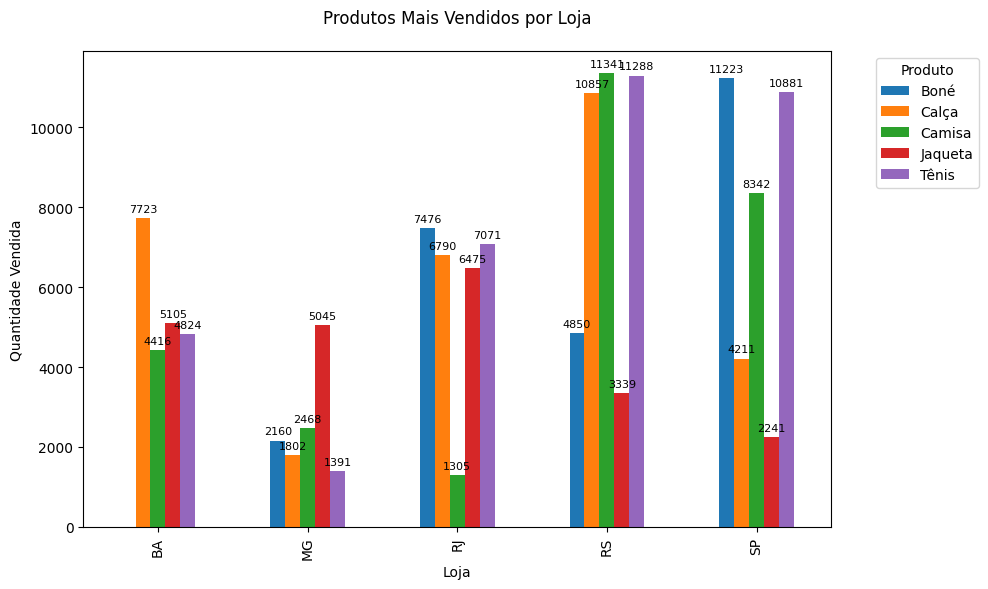

In [15]:
# Visualizando os produtos mais vendidos por loja com gráfico de barras agrupadas
# Este gráfico nos ajuda a visualizar, para cada loja, quais produtos têm maior volume de vendas.
# Ele facilita comparações entre lojas e destaca padrões regionais de consumo.


# Visualizando os produtos mais vendidos por loja com gráfico de barras agrupadas



# Reordenando as colunas manualmente para manter a mesma ordem em todas as lojas
ordem_produtos = ['Boné', 'Calça', 'Camisa', 'Jaqueta', 'Tênis']
mais_vendidos_por_loja = mais_vendidos_por_loja[ordem_produtos]

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
barras = mais_vendidos_por_loja.plot(kind='bar', ax=ax)

# Título e rótulos
plt.title('Produtos Mais Vendidos por Loja', pad=20)
plt.xlabel('Loja')
plt.ylabel('Quantidade Vendida')

# Adicionando os valores em cima de cada barra
for container in barras.containers:
    for bar in container:
        altura = bar.get_height()
        if altura > 0:
            barras.annotate(f'{int(altura)}',
                            xy=(bar.get_x() + bar.get_width() / 2, altura),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=8)

# Ajustando legenda
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajuste de layout
plt.tight_layout()

# Salvando imagem na pasta 'imagens'
plt.savefig('../imagens/produtos_mais_vendidos_por_loja.png')

# Exibindo o gráfico
plt.show()


## Faturamento total por produto em cada loja

Aqui vamos exibir um gráfico que nos ajuda a visualizar claramento o faturamento total por produto em cada uma das lojas

<Figure size 1200x700 with 0 Axes>

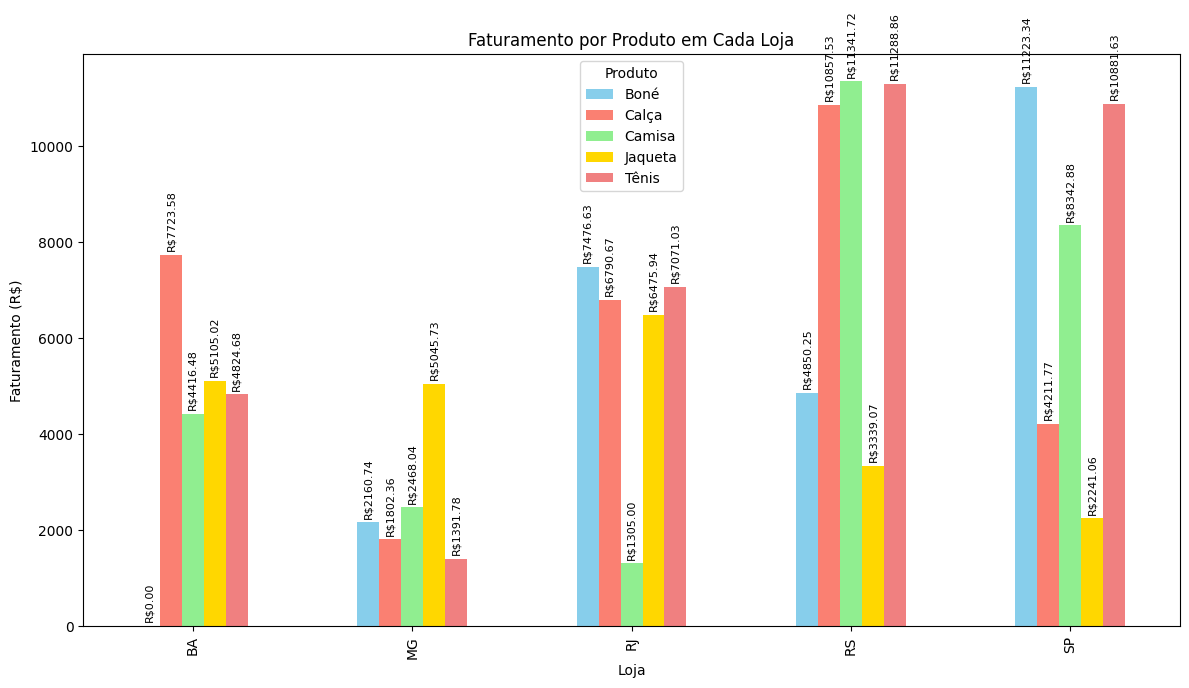

In [16]:
# Visualizando o faturamento por produto em cada loja com gráfico de barras agrupadas

# Reordenando colunas para garantir ordem consistente entre produtos
ordem_produtos = ['Boné', 'Calça', 'Camisa', 'Jaqueta', 'Tênis']
mais_vendidos_por_loja = mais_vendidos_por_loja[ordem_produtos]

# Criando figura
plt.figure(figsize=(12, 7))
ax = mais_vendidos_por_loja.plot(kind='bar', figsize=(12, 7), color=['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral'])

# Título e eixos
plt.title('Faturamento por Produto em Cada Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.legend(title='Produto')

# Adicionando os valores nas barras, com rotação para não sobrepor
for container in ax.containers:
    ax.bar_label(container, fmt='R$%.2f', label_type='edge', fontsize=8, padding=3, rotation=90)

# Ajustando espaço e salvando
plt.tight_layout()
plt.savefig('../imagens/faturamento_por_produto_em_cada_loja.png', bbox_inches='tight')
plt.show()


## Faturamento por loja

Aqui vamos exibir um grafíco do faturamento total por loja, esse gráfico vai nos ajudar a ver com mais clareza qual loja teve a maior receita

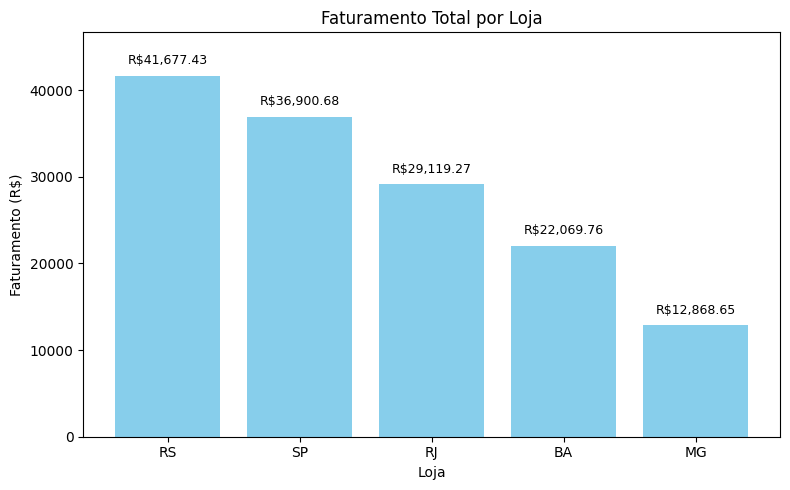

In [17]:
# Visualizando o faturamento total por loja com gráfico de barras
# Esse gráfico mostra claramente qual loja teve maior faturamento.
# Podemos identificar que a loja do RS se destaca, indicando melhor desempenho de vendas.
# A visualização facilita comparações diretas entre as lojas e serve de base para decisões regionais.


# Definindo o tamanho da figura do gráfico
plt.figure(figsize=(8,5))

# Criando um gráfico de barras com os dados de faturamento por loja
plt.bar(faturamento_por_loja.index, faturamento_por_loja.values, color='skyblue')

# Adicionando um título ao gráfico
plt.title('Faturamento Total por Loja')

# Nomeando o eixo x
plt.xlabel('Loja')

# Nomeando o eixo y
plt.ylabel('Faturamento (R$)')

# Adicionando valores em cima das barras
for i, valor in enumerate(faturamento_por_loja.values):
    plt.text(i, valor + 1000, f'R${valor:,.2f}', ha='center', va='bottom', fontsize=9)

#Ajustando limite do eixo y para evitar corte no topo
plt.ylim(0, faturamento_por_loja.max() + 5000)

# Ajustando layout para evitar cortes no conteúdo
plt.tight_layout()

#Salvando o gráfico como imagem .png na pasta 'imagens' para uso no portfolio
plt.savefig('../imagens/faturamento_por_loja.png')


# Exibindo o gráfico
plt.show()

## Faturamento total por categoria

Aqui vamos exibir um gráfico do faturamento total por categorias, esse gráfico vai nos ajudar a visualizar de forma mais clara qual categoria (Infantil, Masculino, Feminino) gera a maior receita

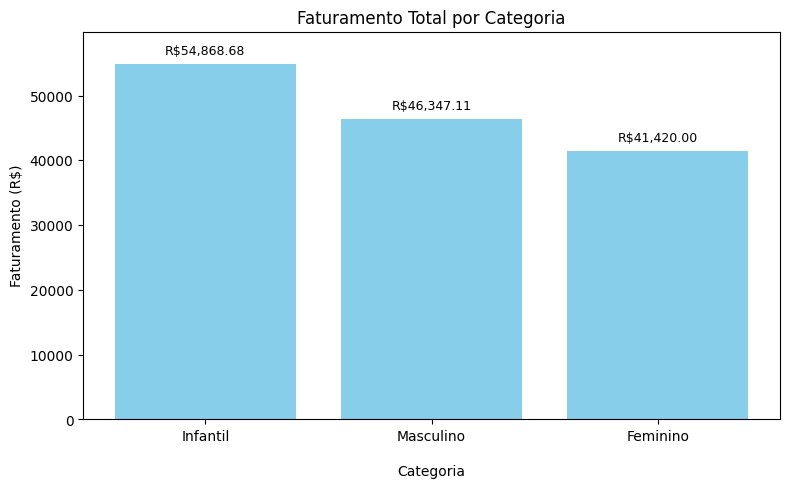

In [18]:
# Visualizando o faturamento total por categoria com gráfico de barras
# Com esse gráfico, podemos ver quais categorias de produtos geram mais receita.
# A categoria 'Infantil' é a que mais fatura, o que pode direcionar estratégias de marketing e estoque.
# Um bom insight para potencializar vendas é focar em produtos da categoria mais lucrativa.


# Definindo o tamanho da figura do gráfico
plt.figure(figsize=(8,5))


# Criando um gráfico de barras com os dados de faturamento por categoria
plt.bar(faturamento_por_categoria.index, faturamento_por_categoria.values, color='skyblue')

# Adicionando um título ao gráfico
plt.title('Faturamento Total por Categoria')

# Nomeando o eixo x, utilizei o labelpad para melhorar o espaçamento
plt.xlabel('Categoria', labelpad=15)

# Nomeando o eixo y
plt.ylabel('Faturamento (R$)')

# Adicionando valores em cima das barras
for i, valor in enumerate(faturamento_por_categoria.values):
    plt.text(i, valor + 1000, f'R${valor:,.2f}', ha='center', va='bottom', fontsize=9)

#Ajustando limite do eixo y para evitar corte no topo
plt.ylim(0, faturamento_por_categoria.max() + 5000)

# Ajustando layout para evitar cortes no conteúdo
plt.tight_layout()

#Ajustando espaçamento 
plt.subplots_adjust(bottom=0.15)

#Salvando o gráfico como imagem .png na pasta 'imagens' para uso no portfolio
plt.savefig('../imagens/faturamento_por_categoria.png')

# Exibindo o gráfico
plt.show()

## Faturamento total por produto

Aqui vamos exibir um gráfico do total por produto, esse gráfico vai nos ajudar a visualizar quais produtos geram mais receita.

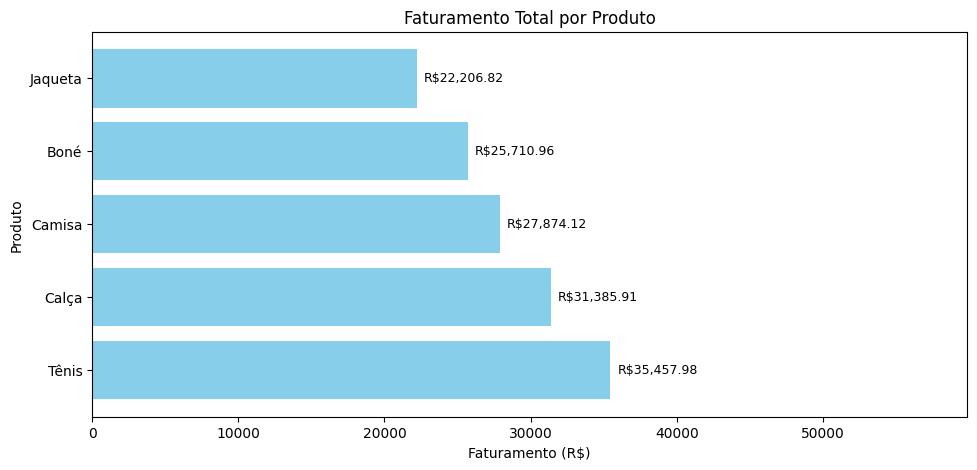

In [19]:
# Visualizando o faturamento total por produto com gráfico de barras horizontais
# Aqui visualizamos o desempenho individual de cada produto.
# O gráfico destaca quais produtos mais contribuem para o faturamento da empresa.
# Essas informações são valiosas para entender o mix de produtos mais rentáveis.


# Definindo o tamanho da figura do gráfico
plt.figure(figsize=(10,5))

# Criando um gráfico de barras horizontal
plt.barh(faturamento_por_produto.index, faturamento_por_produto.values, color='skyblue')

# Adicionando um título ao gráfico
plt.title('Faturamento Total por Produto')

# Nomeando o eixo x
plt.xlabel('Faturamento (R$)')

# Nomeando o eixo y
plt.ylabel('Produto')

# Adicionando valores ao lado das barras
for i, valor in enumerate(faturamento_por_produto.values):
    plt.text(valor + 500, i, f'R${valor:,.2f}', va='center', fontsize=9)

#Ajustando limite do eixo x para evitar cortes no lado direito
plt.xlim(0, faturamento_por_categoria.max() + 5000)

# Ajustando espaçamento para não cortar texto na borda
plt.subplots_adjust(right=1)

#Salvando o gráfico como imagem .png na pasta 'imagens' para uso no portfolio
plt.savefig('../imagens/faturamento_por_produto.png')

# Exibindo o gráfico
plt.show()

## Preço médio dos produtos

Aqui vamos exibir um gráfico que nos mostra com clareza quais os preços médios dos produtos

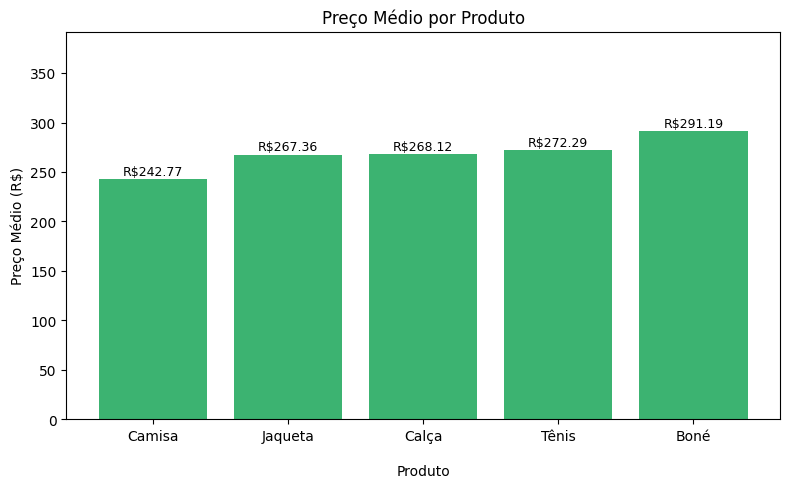

In [20]:
# Visualizando o preço médio por produto com gráfico de barras

# Agrupando os dados para calcular o preço médio de cada produto
preco_medio_por_produto = df.groupby('Produto')['Preço Unitário'].mean().sort_values()

# Definindo o tamanho da figura do gráfico
plt.figure(figsize=(8,5))

# Criando um gráfico de barras com os dados de preço médio
plt.bar(preco_medio_por_produto.index, preco_medio_por_produto.values, color='mediumseagreen')

# Adicionando um título ao gráfico
plt.title('Preço Médio por Produto')

# Nomeando os eixos, usei o labelpad no eixo x para melhorar o espaçamento na parte inferior
plt.xlabel('Produto', labelpad=15)
plt.ylabel('Preço Médio (R$)')

# Adicionando valores em cima das barras
for i, valor in enumerate(preco_medio_por_produto.values):
    plt.text(i, valor + 1, f'R${valor:.2f}', ha='center', va='bottom', fontsize=9)

# Ajustando o limite do eixo y para evitar corte no topo
plt.ylim(0, preco_medio_por_produto.max() + 100)

# Ajustando layout para evitar cortes no conteúdo
plt.tight_layout()

# Salvando o gráfico como imagem na pasta 'imagens'
plt.savefig('../imagens/preco_medio_por_produto.png')

#Ajustando espaçamento 
plt.subplots_adjust(bottom=0.15)

# Exibindo o gráfico
plt.show()


## Faturamento por categoria em cada loja

Aqui vamos exibir um gráfico que nos ajuda a visualizar o faturamento das categorias em cada loja

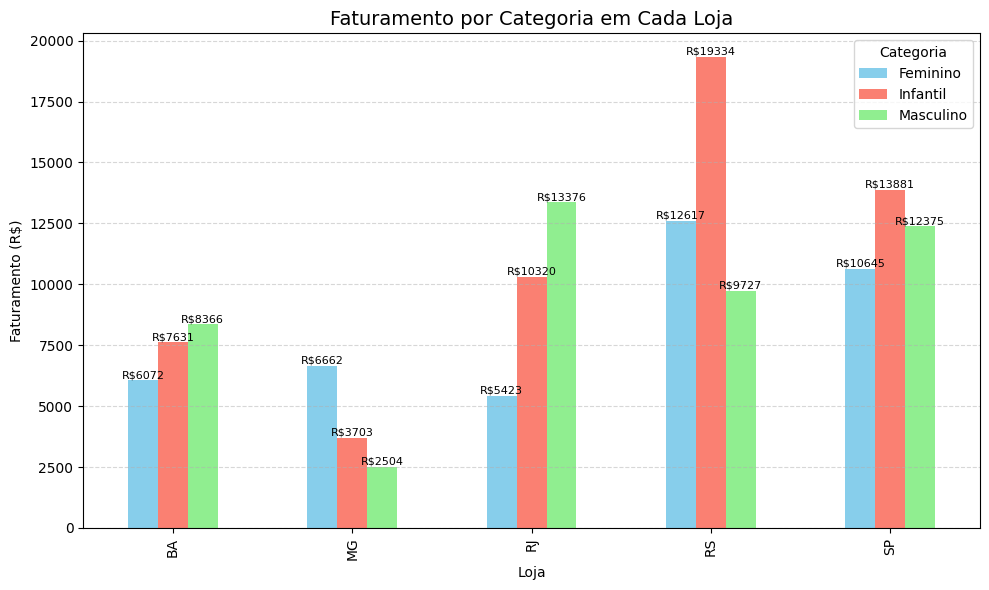

In [21]:
# Gráfico de barras agrupadas para faturamento por categoria em cada loja
# Esse gráfico compara o faturamento das categorias entre as diferentes lojas.
# Ele ajuda a entender como cada tipo de produto performa regionalmente.
# É possível perceber, por exemplo, que o RS lidera na categoria Infantil, o que pode justificar seu alto faturamento total.
# Esse tipo de análise é essencial para ajustar o foco de vendas por região.


faturamento_pivot.plot(kind='bar', 
                       figsize=(10,6), 
                       color=['skyblue', 'salmon', 'lightgreen'])

# Título claro e informativo
plt.title('Faturamento por Categoria em Cada Loja', fontsize=14)

# Nome dos eixos
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')

# Adicionando rótulos de valores em cima de cada barra
for container in plt.gca().containers:
    plt.bar_label(container, fmt='R$%.0f', label_type='edge', fontsize=8)

# Legenda com título para deixar claro o que representa cada cor
plt.legend(title='Categoria')

# Grade no eixo y para facilitar leitura
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Layout ajustado
plt.tight_layout()

#Salvando o gráfico como imagem .png na pasta 'imagens' para uso no portfolio
plt.savefig('../imagens/faturamento_pivot.png')

# Exibindo o gráfico
plt.show()


## ✅ Conclusão da Análise

Nesta análise exploratória, examinamos um conjunto de dados de vendas de roupas em diferentes lojas e categorias de produtos. Através de agrupamentos, somatórios e visualizações gráficas, conseguimos extrair diversos insights relevantes:

- **Produtos infantis** foram os mais lucrativos no total, com destaque para a loja do **RS**, que lidera o faturamento geral por atender muito bem esse segmento.
- A loja de **MG** apresentou o menor desempenho de vendas em todas as categorias, indicando um potencial para estratégias específicas de marketing e estoque.
- O **Tênis** foi o produto com maior faturamento, enquanto a **Jaqueta** teve o menor, o que pode orientar decisões de reposição e promoções.
- A análise por **categoria e loja** revelou padrões de preferência regionais, que podem ser explorados para ações localizadas.
- O **preço médio** por produto também ajuda a entender a precificação por item e sua relação com o faturamento.

Com base nos dados e visualizações, é possível propor melhorias direcionadas, ajustes de estoque e estratégias de vendas mais alinhadas com o comportamento dos consumidores por região e tipo de produto.

Este projeto marca meu primeiro passo no portfólio de Análise de Dados, reforçando o aprendizado em Python, Pandas e visualizações com Matplotlib.  
